### Cet exercice a pour but de mettre en pratique les connaissances apprises en DL ainsi que celle de Tensorflow

## Il s'afit de faire de constater l'impact de la qualité de l'air sur la santé de l'HOMME

# Cela se passera en plusieurs étapes :
                1. Importation des librairies
                2. Importation de la dataset
                3. Prétraitement de la dataset
                4. Mise en place du réseau de neurones
                5. Entrainement
                6. Validation
                7. Enregistrement
                

# 1. Importation des librairies nécéssaires


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 2. Importation de la dataset

In [2]:
dataset = pd.read_csv("air_quality_health_impact_data.csv", sep=",")
dataset

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


# 3. Prétraitement de la dataset

In [3]:
dataset.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [5]:
dataset["HealthImpactClass"].value_counts()

HealthImpactClass
0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: count, dtype: int64

In [6]:
dataset.dtypes

RecordID                 int64
AQI                    float64
PM10                   float64
PM2_5                  float64
NO2                    float64
SO2                    float64
O3                     float64
Temperature            float64
Humidity               float64
WindSpeed              float64
RespiratoryCases         int64
CardiovascularCases      int64
HospitalAdmissions       int64
HealthImpactScore      float64
HealthImpactClass      float64
dtype: object

In [7]:
colonnes = "AQI	PM10	PM2_5	NO2	SO2	O3	Temperature	Humidity	WindSpeed	RespiratoryCases	CardiovascularCases	HospitalAdmissions	HealthImpactScore	HealthImpactClass"

colonnes.split(" ")
colonnes = colonnes.split("\t")
colonnes

['AQI',
 'PM10',
 'PM2_5',
 'NO2',
 'SO2',
 'O3',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'RespiratoryCases',
 'CardiovascularCases',
 'HospitalAdmissions',
 'HealthImpactScore',
 'HealthImpactClass']

In [8]:
for index in colonnes:
    print(dataset[index].value_counts())

AQI
187.270059    1
365.743180    1
115.690318    1
278.520257    1
439.665108    1
             ..
402.494500    1
338.233969    1
301.743833    1
280.330047    1
83.269257     1
Name: count, Length: 5811, dtype: int64
PM10
295.853039    1
118.005852    1
290.163962    1
250.671213    1
114.930430    1
             ..
51.382023     1
179.829163    1
139.017303    1
90.369388     1
82.216262     1
Name: count, Length: 5811, dtype: int64
PM2_5
13.038560     1
187.720063    1
137.681867    1
192.120162    1
171.248808    1
             ..
151.797288    1
37.782771     1
79.927696     1
160.585968    1
119.968244    1
Name: count, Length: 5811, dtype: int64
NO2
6.639263      1
122.579687    1
197.872929    1
174.994041    1
110.482093    1
             ..
154.746347    1
12.760949     1
191.622706    1
75.981038     1
193.440691    1
Name: count, Length: 5811, dtype: int64
SO2
66.161150    1
47.827206    1
76.728857    1
33.395636    1
15.890748    1
            ..
72.370443    1
46.86805

In [9]:
dataset.isna().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [10]:
dataset.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [11]:
dataset = dataset.drop(columns="RecordID")

In [12]:
dataset

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [13]:
X = dataset.drop(columns="HealthImpactClass", axis=1)
y = dataset["HealthImpactClass"]

In [14]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5806    4.0
5807    3.0
5808    1.0
5809    4.0
5810    0.0
Name: HealthImpactClass, Length: 5811, dtype: float64

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [16]:
y.sort_values()

0       0.0
3594    0.0
3593    0.0
3592    0.0
3590    0.0
       ... 
5729    4.0
5532    4.0
5647    4.0
5780    4.0
5708    4.0
Name: HealthImpactClass, Length: 5811, dtype: float64

In [17]:
# scaler = StandardScaler()
# dataset = scaler.fit_transform(dataset)
# dataset = pd.DataFrame(dataset)
# dataset.columns = colonnes
# dataset.describe()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
# model.add(tf.keras.layers.Dense(1024, activation="relu"))
# model.add(tf.keras.layers.Dropout(rate=0.3))
# model.add(tf.keras.layers.Dense(1024, activation="relu"))
# model.add(tf.keras.layers.Dropout(rate=0.2))
# model.add(tf.keras.layers.Dense(1024, activation="relu"))
# model.add(tf.keras.layers.Dropout(rate=1))
# model.add(tf.keras.layers.Dense(1024, activation="relu"))
# model.add(tf.keras.layers.Dense(512, activation="relu"))
# model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.15))
model.add(tf.keras.layers.Dense(5, activation="softmax"))

In [20]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415 (1.62 KB)

 Trainable params: 415 (1.62 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=20)
best_model = "qualitedelair.keras"
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath=best_model,
                                               monitor="val_accuracy",
                                               mode = "max",
                                               save_best_only=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [23]:
history = model.fit(X_train, y_train, epochs= 200, validation_data= (X_test, y_test), callbacks=[ stop, model_ckp, tensorboard_callback])

Epoch 1/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3011 - loss: 1.6624 - val_accuracy: 0.8366 - val_loss: 0.8309
Epoch 2/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8143 - loss: 0.8101 - val_accuracy: 0.8366 - val_loss: 0.5174
Epoch 3/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8290 - loss: 0.5833 - val_accuracy: 0.8358 - val_loss: 0.4641
Epoch 4/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8291 - loss: 0.5292 - val_accuracy: 0.8555 - val_loss: 0.4483
Epoch 5/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8647 - loss: 0.5036 - val_accuracy: 0.8745 - val_loss: 0.4385
Epoch 6/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8740 - loss: 0.4843 - val_accuracy: 0.8796 - val_loss: 0.4310
Epoch 7/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8800 - loss: 0.4520 - val_accuracy: 0.8908 - val_loss: 0.4226
Epoch 8/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8758 - loss: 0.4819 - val_acc

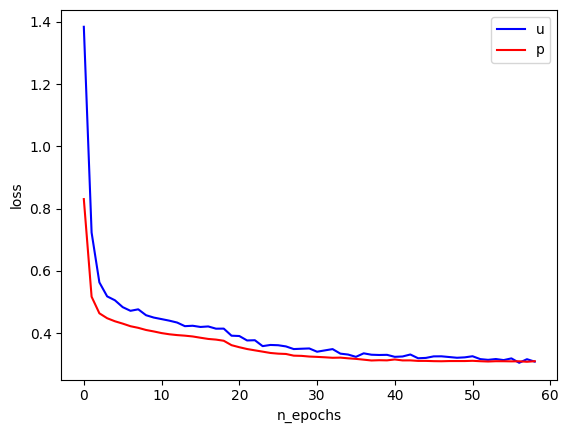

In [24]:
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["loss"], c="b")
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["val_loss"], c="r")
plt.xlabel("n_epochs")
plt.ylabel("loss")
plt.legend("upper right")
plt.show()

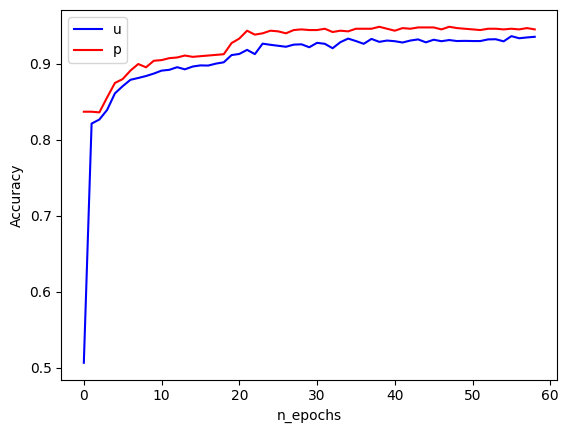

In [25]:
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["accuracy"], c="b")
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["val_accuracy"], c="r")
plt.xlabel("n_epochs")
plt.ylabel("Accuracy")
plt.legend("upper right")
plt.show()

In [33]:
loaded_model = tf.keras.models.load_model("qualitedelair.keras", compile=False)

In [34]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [56]:
loaded_model.predict(X_test[56:57])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[9.8555702e-01, 9.0734859e-04, 2.9564793e-03, 5.0145602e-03,
        5.5645118e-03]], dtype=float32)

In [40]:
X_test[:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
3566,0.267366,-0.301322,-0.988102,-0.286671,0.304396,1.113478,0.507516,0.814999,0.382087,-0.311345,0.907251,-0.000738,0.466653


In [58]:
y[56]

1.0

(1163, 13)